In [1]:
from IPython.display import SVG, display

# Establishing the waiting time to a genealogical tree change along a chromosome produced under a multispecies coalescent model approximation with SMC'

This is a direct adaptation of Deng et al. 2021: https://www.sciencedirect.com/science/article/pii/S0040580921000484#b2

Let's assume a multispecies coalescent model where we have a topology, divergence times, and a separate, constant Ne value for each edge.

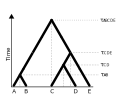

In [2]:
display(SVG('./species_tree_on_axis.svg'));

Note that that the variation in branch-specific Ne values isn't displayed here.

We can deconstruct that species tree, retaining the divergence times and order of the tips, preserving the topology. Here, the divergence times act like walls, where coalescences can't happen horizontally across them:

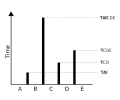

In [3]:
display(SVG('./deconstructed_species_tree.svg'));

And now, conditional on the topology, divergence times, and branch-specific Ne values, we can simulate a single genealogy under the multispecies coalescent model:

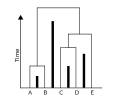

In [4]:
display(SVG('./genealogy.svg'));

### Defining terms:

$t$ = location of recombination event  
$b$ = some focal branch  
$n$ = the number of tips on the tree  
$D_{b}(t)$ = the number of available branches to coalesce with, divided by the population size  
$x_{b}(t)$ = the interval number ($\in 1, 2, 3, ...$) to which $t$ belongs  
$T_{bx}$ = an interval along a branch within which $D_{b}(t)$ is constant. Bounded by $\sigma_{b(x-1)}$ and $\sigma_{bx}$  
$\sigma_{bx}$ = the time at which the interval $T_{bx}$ ends.  
$|T_{bx}|$ = $(\sigma_{bx} - \sigma_{b(x-1)})$ =  the length of the interval $T_{bx}$  
$i_{bx}$ =  the value of $D_{b}(t)$ at every time $t$ within the interval $T_{bx}$  
$k_{b}$ =  number of distinct intervals $T_{bx}$ on branch b.  
$\Im$ = the genealogy  
$L(\Im)$ = total length of the genealogy  

### Example branches broken into intervals:

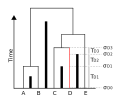

In [5]:
display(SVG('./genealogy_dbranch.svg'));

$i_{D1} = \frac{1}{2Ne_{D}}$  
  
$i_{D2} = \frac{2}{2Ne_{CD}}$  
  
$i_{D3} = \frac{3}{2Ne_{CDE}}$  

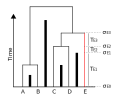

In [8]:
display(SVG('./genealogy_ebranch.svg'));

$i_{D1} = \frac{1}{2Ne_{E}}$  
  
$i_{D2} = \frac{3}{2Ne_{CDE}}$  
  
$i_{D3} = \frac{2}{2Ne_{CDE}}$  

### The math:

## Proposition 1:  

$\mathbb{P}($tree unchanged$ | b, t, \Im) = \int_{t}^{t_{b}^{u}} \frac{1}{D_{b}(t)} p(\tau | t) d\tau$

$= \int_{t}^{t_{b}^{u}} \exp{[-\int_{t}^{\tau} D_{b}(s) ds]d\tau}$

$= \int_{t}^{\sigma_{bx_{b}(t)}} \exp{[-\int_{t}^{\tau} D_{b}(s) ds]} + \Sigma_{j=x_{b}(t) + 1}^{k_{b}} \int_{\sigma_{b(j-1)}}^{\sigma_{bj}} \exp{[-\int_{t}^{\tau} D_{b}(s) ds]d\tau}$

Let's take the first term:

$\int_{t}^{\sigma_{bx_{b}(t)}} \exp{[-\int_{t}^{\tau} D_{b}(s) ds]}$

Since $D_{b}(s)$ is constant through the interval $[t,\tau]$, we can pull the $D_{b}(s)$ out in front of the integral.

$=\int_{t}^{\sigma_{bx_{b}(t)}} \exp{[-D_{b}(t)(\tau-t)]}d\tau$

$=\int_{t}^{\sigma_{bx_{b}(t)}} \exp{[-i_{bx_{b}(t)}(\tau-t)]}d\tau$

$=\frac{\exp{[-i_{bx_{b}(t)}(\sigma_{bx_{b}(t)}-t)]}}{-i_{bx_{b}(t)}} - \frac{1}{-i_{bx_{b}(t)}}$

$=\frac{1-\exp{[-i_{bx_{b}(t)}(\sigma_{bx_{b}(t)}-t)]}}{i_{bx_{b}(t)}}$

$=\frac{1-\exp{[i_{bx_{b}(t)}t-i_{bx_{b}(t)}\sigma_{bx_{b}(t)}]}}{i_{bx_{b}(t)}}$

$=\frac{1}{i_{bx_{b}(t)}} - \frac{1}{i_{bx_{b}(t)}}e^{-i_{bx_{b}(t)}\sigma_{bx_{b}(t)}}e^{i_{bx_{b}(t)}t}$

To condense it:

= $\frac{1}{i_{bx_{b}(t)}} + P_{ii}e^{i_{bx_{b}(t)}t}$

Yay! Save this for later. Now let's refocus on the second term:

$\Sigma_{j=x_{b}(t) + 1}^{k_{b}} \int_{\sigma_{b(j-1)}}^{\sigma_{bj}} \exp{[-\int_{t}^{\tau} D_{b}(s) ds]d\tau}$

Let's work inside the summation (save the summation for the end!):

$\int_{\sigma_{b(j-1)}}^{\sigma_{bj}} \exp{[-\int_{t}^{\tau} D_{b}(s) ds]d\tau}$

$=\exp{[-\int_{t}^{\sigma_{b(j-1)}}D_{b}(s)ds]}*[\int_{\sigma_{b(j-1)}}^{\sigma_{bj}}\exp{(-\int_{\sigma_{b(j-1)}}^{\tau}D_{b}(s)ds)}d\tau]$

Again, let's break this apart and focus on the first half:

$\exp{[-\int_{t}^{\sigma_{b(j-1)}}D_{b}(s)ds]}$

$=\exp{[-\int_{t}^{\sigma_{bx_{b}(t)}}D_{b}(s)ds -\int_{\sigma_{bx_{b}(t)}}^{\sigma_{b(j-1)}}D_{b}(s)ds]}$

$=\exp[-i_{bx_{b}(t)}(\sigma_{bx_{b}(t)}-t) - \Sigma_{m=x_{b}(t)+1}^{j-1}i_{bm}|T_{bm}|]$

$=e^{i_{bx_{b}(t)}t}\exp[-i_{bx_{b}(t)}\sigma_{bx_{b}(t)} - \Sigma_{m=x_{b}(t)+1}^{j-1}i_{bm}|T_{bm}|]$

Great! Save this for later. And now we can finish with the second half:

$\int_{\sigma_{b(j-1)}}^{\sigma_{bj}}\exp{(-\int_{\sigma_{b(j-1)}}^{\tau}D_{b}(s)ds)}d\tau$

$=\int_{\sigma_{b(j-1)}}^{\sigma_{bj}}\exp{(-i_{bj}(\tau-\sigma_{b(j-1)}))}$

$=\frac{\exp{(-i_{bj}(\sigma_{bj}-\sigma_{b(j-1)}))}}{-i_{bj}} - \frac{1}{-i_{bj}}$

$=\frac{1}{i_{bj}} - \frac{\exp{(-i_{bj}(\sigma_{bj}-\sigma_{b(j-1)}))}}{i_{bj}} $

$=\frac{1}{i_{bj}}(1-e^{-i_{bj}|T_{bj}|})$

Now let's put the whole second term back together, and condense it:

$e^{i_{bx_{b}(t)}t}\exp[-i_{bx_{b}(t)}\sigma_{bx_{b}(t)} - \Sigma_{m=x_{b}(t)+1}^{j-1}i_{bm}|T_{bm}|]\frac{1}{i_{bj}}(1-e^{-i_{bj}|T_{bj}|})$

$=P_{ij}e^{i_{bx_{b}(t)}t}$

And we're done. Now we can finally stitch everything back together:

$\frac{1}{i_{bx_{b}(t)}} - \frac{1}{i_{bx_{b}(t)}}e^{-i_{bx_{b}(t)}\sigma_{bx_{b}(t)}}e^{i_{bx_{b}(t)}t} + \Sigma_{j=x_{b}(t) + 1}^{k_{b}} \frac{1}{i_{bj}}(1-e^{-i_{bj}|T_{bj}|})e^{i_{bx_{b}(t)}t}\exp(-i_{bx_{b}(t)}\sigma_{bx_{b}(t)} - \Sigma_{m=x_{b}(t)+1}^{\sigma_{b(j-1)}}i_{bm}|T_{bm}|)$

$= \frac{1}{i_{bx_{b}(t)}} + P_{ii}e^{i_{bx_{b}(t)}t} + \Sigma_{j=x_{b}(t) + 1}^{k_{b}} P_{ij}e^{i_{bx_{b}(t)}t} $

### Final answer:

$\mathbb{P}($tree unchanged$ | b, t, \Im) = \frac{1}{i_{bx_{b}(t)}} + e^{i_{bx_{b}(t)}t} (P_{ii} + \Sigma_{j=x_{b}(t) + 1}^{k_{b}} P_{ij})$

Where:

$P_{ii} = - \frac{1}{i_{bx_{b}(t)}}e^{-i_{bx_{b}(t)}\sigma_{bx_{b}(t)}}$  
$P_{ij} = \exp[-i_{bx_{b}(t)}\sigma_{bx_{b}(t)} - \Sigma_{m=x_{b}(t)+1}^{j-1}i_{bm}|T_{bm}|]\frac{1}{i_{bj}}(1-e^{-i_{bj}|T_{bj}|})$  
$i_{bz} = D_{b}(t)$, where $x(t) = z$

## Proposition 2:

$\mathbb{P}($tree unchanged$ | b, \Im)=\frac{1}{t_b^u-t_b^l} \times \int_{t_{b}^{l}}^{t_{b}^{u}}\mathbb{P}($tree unchanged$ | b, t, \Im)$

$= \frac{1}{t_b^u-t_b^l} \Sigma_{x=1}^{k_b} \int_{\sigma_{x-1}}^{\sigma_{x}}\mathbb{P}($tree unchanged$ | b, t, \Im)dt$

Let's tackle the integral:

$\int_{\sigma_{b(x-1)}}^{\sigma_{bx}}\mathbb{P}($tree unchanged$ | b, t, \Im)dt$

$=\int_{\sigma_{b(x-1)}}^{\sigma_{bx}} \frac{1}{i_{bx_{b}(t)}} + e^{i_{bx_{b}(t)}t} (P_{ii} + \Sigma_{j=x_{b}(t) + 1}^{k_{b}} P_{ij})dt$

$=\frac{1}{i_{bx_{b}(t)}} [T_{bx} + (e^{i_{bx_{b}(t)}\sigma_{bx}}-e^{i_{bx_{b}(t)}\sigma_{b(x-1)}})(P_{ii} + \Sigma_{j=x_{b}(t) + 1}^{k_{b}} P_{ij})]$

$=p_{b}^{(i)}$

So, finally:

$\mathbb{P}($tree unchanged$ | b, \Im)=\frac{1}{t_b^u-t_b^l} \Sigma_{x=1}^{k_b}p_{b}^{(i)}$

## Theorem 1:

The probability of a recombination event not changing the tree is:

$\mathbb{P}($tree unchanged$ | \Im) = \Sigma_{b=1}^{2n-2}[\frac{t_b^u-t_b^l}{L(\Im)}]\mathbb{P}($tree unchanged$ | b, \Im)$

$= \frac{1}{L(\Im)}\Sigma_{b=1}^{2n-2}\Sigma_{x=1}^{k_b}p_{b}^{(i)}$

## Theorem 2:

The distribution of waiting distance until the next tree change given the current genealogical tree $\Im$ is given by:

$p_r(d|\Im)=\frac{\rho}{2}\alpha(\Im)L(\Im)\exp{[-\frac{\rho}{2}\alpha(\Im)L(\Im)d]}$

where:

$\alpha(\Im)=1-\mathbb{P}($tree unchanged$ | \Im)$